In [1]:
import networkx as nx
# To visualize in jupyter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [10]:
all_data = pd.read_csv('comtrade_bec.csv')

In [18]:
pd.set_option('display.max_columns', None)
all_data.head()

Classification  Year  Period  Period Desc.  Aggregate Level  Is Leaf Code  \
0             BE  2011    2011          2011                1             0   
1             BE  2011    2011          2011                1             0   
2             BE  2011    2011          2011                1             0   
3             BE  2011    2011          2011                1             0   
4             BE  2011    2011          2011                1             0   

   Trade Flow Code Trade Flow  Reporter Code     Reporter Reporter ISO  \
0                1     Import              4  Afghanistan          AFG   
1                2     Export              4  Afghanistan          AFG   
2                1     Import              8      Albania          ALB   
3                2     Export              8      Albania          ALB   
4                1     Import             12      Algeria          DZA   

   Partner Code Partner Partner ISO  2nd Partner Code  2nd Partner  \
0             0   World         WLD               NaN          NaN   
1             0   World         WLD               NaN          NaN   
2             0   World         WLD               NaN          NaN   
3             0   World         WLD               NaN          NaN   
4             0   World         WLD               NaN          NaN   

   2nd Partner ISO  Customs Proc. Code  Customs  Mode of Transport Code  \
0              NaN                 NaN      NaN                     NaN   
1              NaN                 NaN      NaN                     NaN   
2              NaN                 NaN      NaN                     NaN   
3              NaN                 NaN      NaN                     NaN   
4              NaN                 NaN      NaN                     NaN   

   Mode of Transport  Commodity Code           Commodity  Qty Unit Code  \
0                NaN               1  Food and beverages              1   
1                NaN               1  Food and beverages              1   
2                NaN               1  Food and beverages              1   
3                NaN               1  Food and beverages              1   
4                NaN               1  Food and beverages              1   

      Qty Unit  Qty  Alt Qty Unit Code  Alt Qty Unit  Alt Qty  Netweight (kg)  \
0  No Quantity  NaN                NaN           NaN      NaN             NaN   
1  No Quantity  NaN                NaN           NaN      NaN             NaN   
2  No Quantity  NaN                NaN           NaN      NaN             NaN   
3  No Quantity  NaN                NaN           NaN      NaN             NaN   
4  No Quantity  NaN                NaN           NaN      NaN             NaN   

   Gross weight (kg)  Trade Value (US$)  CIF Trade Value (US$)  \
0                NaN          632778127                    NaN   
1                NaN          140887449                    NaN   
2                NaN          773334715                    NaN   
3                NaN           73740061                    NaN   
4                NaN         8836403415                    NaN   

   FOB Trade Value (US$)  Flag  
0                    NaN     0  
1                    NaN     0  
2                    NaN     0  
3                    NaN     0  
4                    NaN     0

In [14]:
all_data[['Reporter']].nunique()

Reporter    181
dtype: int64

In [20]:
col_need = ['Year', 'Trade Flow', 'Reporter', 'Commodity', 'Trade Value (US$)']
need_data = all_data.drop(all_data.columns.difference(col_need), axis=1)

In [22]:
need_data.head()

Year Trade Flow     Reporter           Commodity  Trade Value (US$)
0  2011     Import  Afghanistan  Food and beverages          632778127
1  2011     Export  Afghanistan  Food and beverages          140887449
2  2011     Import      Albania  Food and beverages          773334715
3  2011     Export      Albania  Food and beverages           73740061
4  2011     Import      Algeria  Food and beverages         8836403415

In [62]:
eshek = need_data.groupby('Commodity')['Trade Value (US$)'].sum()
eshek.sort_values(ascending=False)

Commodity
Industrial supplies nes                                                          47856283874121
Capital goods (except transport equipment), and parts and accessories thereof    40070511231035
Fuels and lubricants                                                             21552536244731
Transport equipment, and parts and accessories thereof                           20383989354459
Consumption goods nes                                                            20339571428412
Food and beverages                                                               11363159161995
Goods nes                                                                         8934952961312
Name: Trade Value (US$), dtype: int64

In [63]:
poni = need_data.loc[need_data['Commodity'] == 'Industrial supplies nes']\
    .groupby('Reporter')['Trade Value (US$)'].sum()

poni.sort_values(ascending=False).head(10)

Reporter
USA                     4921990701833
China                   4839068824464
Germany                 3575118643832
China, Hong Kong SAR    2077564143319
Japan                   1881006313943
Belgium                 1732761306227
Rep. of Korea           1682117902648
United Kingdom          1555085305509
Italy                   1528823875830
India                   1466778881591
Name: Trade Value (US$), dtype: int64

## Networks

In [71]:
reporter_node_names = [f'{t}_{n}' for n, t in zip(need_data['Reporter'], need_data['Trade Flow']) if t in ['Import', 'Export']]

In [74]:
commodity_node_names = list(set(need_data['Commodity']))
all_nodes = reporter_node_names + commodity_node_names

In [76]:
all_edges = [(f'{t}_{n}', c, w) for n, t, c, w in zip(need_data['Reporter'], need_data['Trade Flow'], need_data['Commodity'], need_data['Trade Value (US$)']) if t in ['Import', 'Export']]

In [79]:
G = nx.Graph()
G.add_nodes_from(all_nodes)
G.add_weighted_edges_from(all_edges)

In [129]:
def draw_graph(g, figsize=(20, 30), fontsize=12):
    dig = dict(nx.degree(g)) # degree of network
    top = nx.bipartite.sets(g)[0]
    pos = nx.bipartite_layout(g, top)
    plt.figure(figsize=figsize) #Control figure size
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
    nx.draw(g,pos,with_labels=True
            ,font_size=fontsize # labelsize
            ,cmap=plt.cm.YlOrRd # color_map
           )

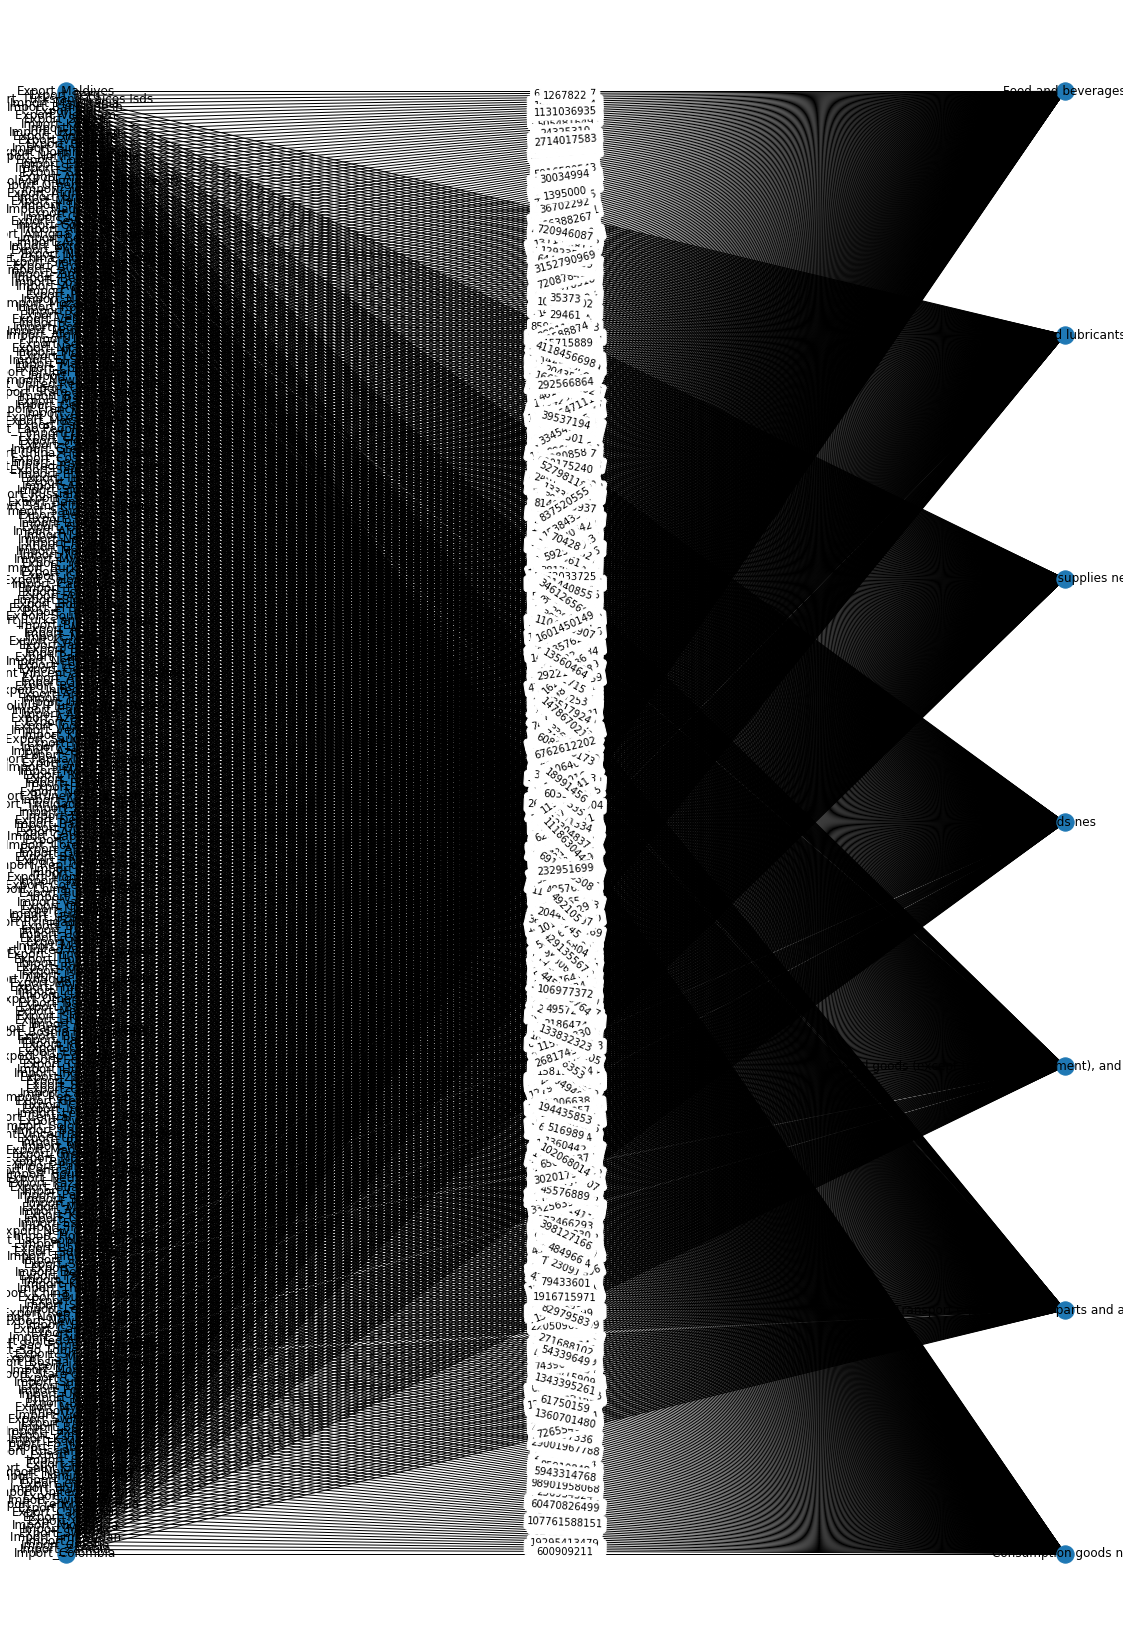

In [130]:
draw_graph(G)

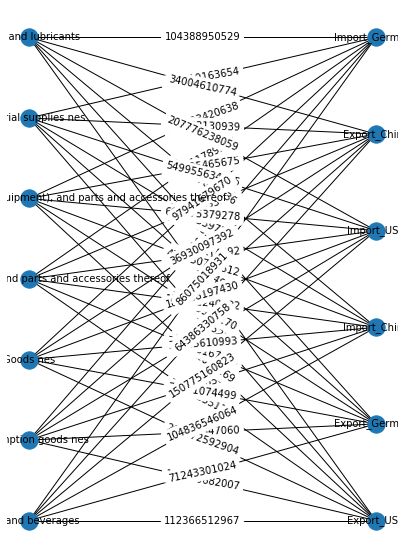

In [133]:
sub_countries = [f'{t}_{n}' for n in ['USA', 'China','Germany'] for t in ['Import', 'Export']]
sub_nodes = sub_countries + commodity_node_names
k = G.subgraph(sub_nodes)
draw_graph(k, figsize=(7, 10), fontsize=10)

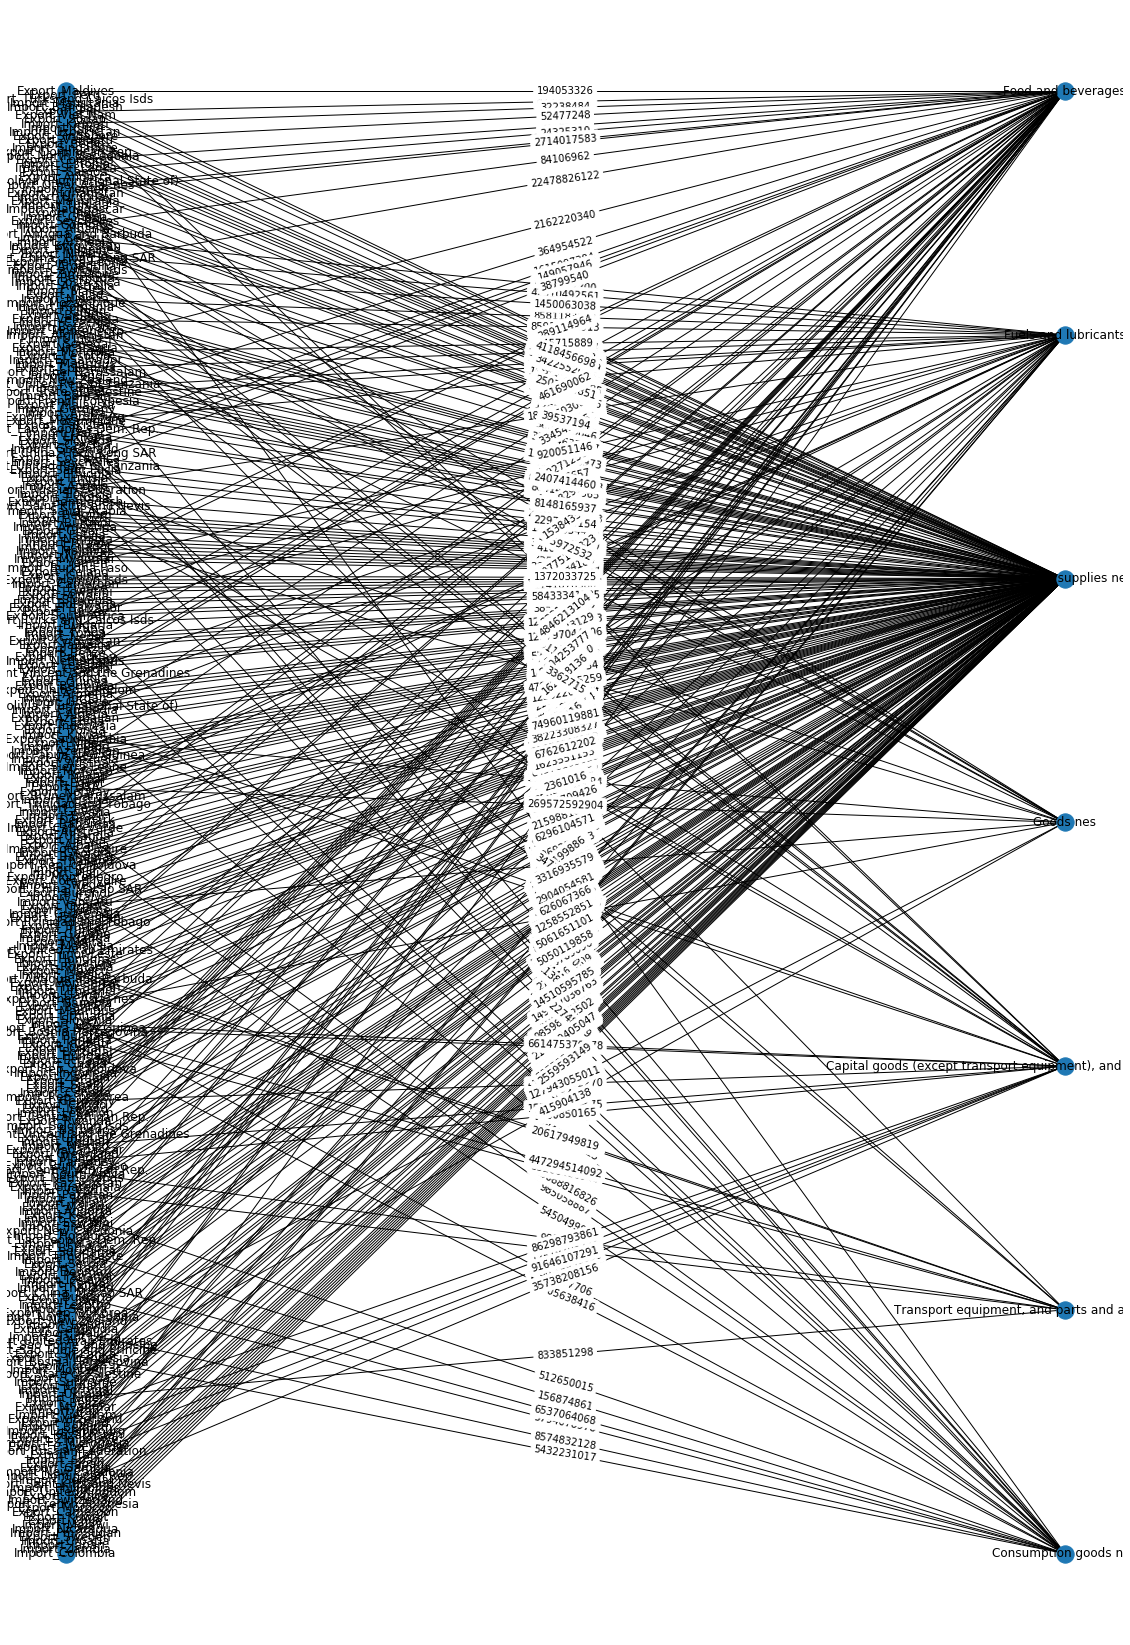

In [134]:
T = nx.maximum_spanning_tree(G)
draw_graph(T)

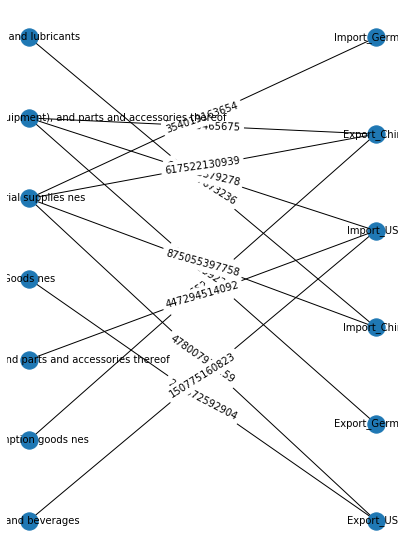

In [136]:
q = T.subgraph(sub_nodes)
draw_graph(q, figsize=(7, 10), fontsize=10)

In [137]:
print('Full Graph')
print(nx.info(G))

Full Graph
Name: 
Type: Graph
Number of nodes: 367
Number of edges: 2510
Average degree:  13.6785


In [138]:
print('Maximum Spanning Tree Graph')
print(nx.info(T))

Maximum Spanning Tree Graph
Name: 
Type: Graph
Number of nodes: 367
Number of edges: 366
Average degree:   1.9946


In [139]:
from operator import itemgetter

centrality = nx.eigenvector_centrality(T)
sorted_centrality = sorted(centrality.items(), key=itemgetter(1), reverse=True)
sorted_centrality[:4]

[('Industrial supplies nes', 0.7070740945269002),
 ('Export_China', 0.049797023494803666),
 ('Import_China', 0.049548204840573803),
 ('Export_USA', 0.04951670470220958)]

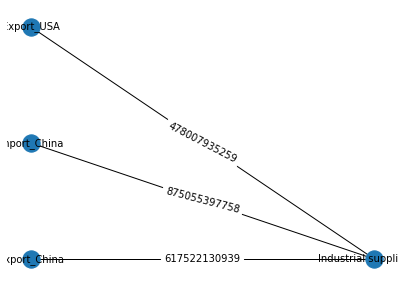

In [140]:
top_nodes = ['Industrial supplies nes', 'Export_China', 'Import_China','Export_USA']
p = T.subgraph(top_nodes)
draw_graph(p, figsize=(7, 5), fontsize=10)